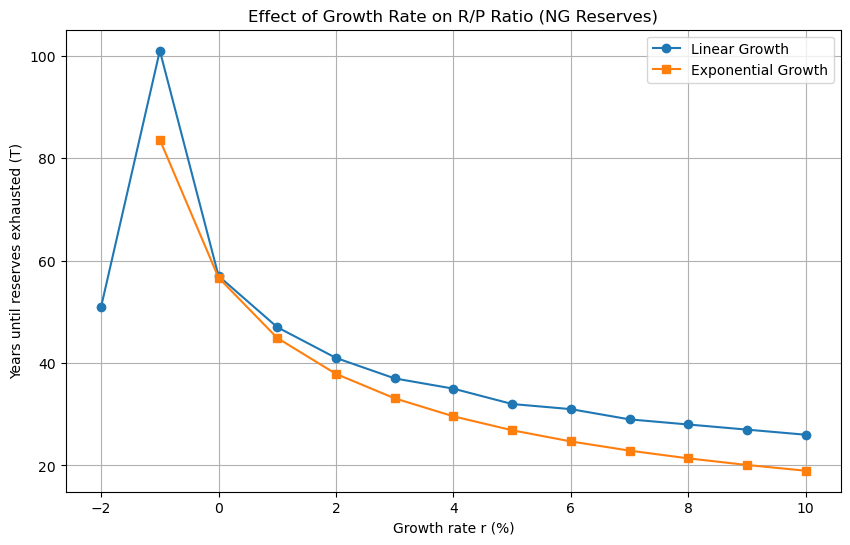

In [1]:
# R/P ratio graphs

import numpy as np
import matplotlib.pyplot as plt

# Given values
R = 1.87e11  # total reserves (m3)
P = 3.3e9    # annual production (m3)

# Growth rates from -2% to +10%
rates = np.arange(-0.02, 0.101, 0.01)

# Arrays to store exhaustion times
T_linear = []
T_exponential = []

# Calculate exhaustion times for each growth rate
for r in rates:
    # Linear growth in production: P_t = P * (1 + r*t)
    t = 0
    reserves = R
    while reserves > 0 and t < 10000:  # safeguard loop
        production = P * (1 + r*t)
        if production < 0:  # avoid negative production
            break
        reserves -= production
        t += 1
    T_linear.append(t)

    # Exponential growth in production: P_t = P * exp(r*t)
    if r == 0:
        T_exponential.append(R / P)  # simple division if no growth
    else:
        # Integral of production from 0 to T: (P/r) * (exp(r*T) - 1) = R
        val = (R * r / P) + 1
        if val > 0:
            T = np.log(val) / r
            T_exponential.append(T)
        else:
            T_exponential.append(np.nan)

# Convert lists to numpy arrays
T_linear = np.array(T_linear)
T_exponential = np.array(T_exponential)

# Plot results
plt.figure(figsize=(10,6))
plt.plot(rates*100, T_linear, marker='o', label='Linear Growth')
plt.plot(rates*100, T_exponential, marker='s', label='Exponential Growth')
plt.xlabel("Growth rate r (%)")
plt.ylabel("Years until reserves exhausted (T)")
plt.title("Effect of Growth Rate on R/P Ratio (NG Reserves)")
plt.legend()
plt.grid(True)
plt.show()


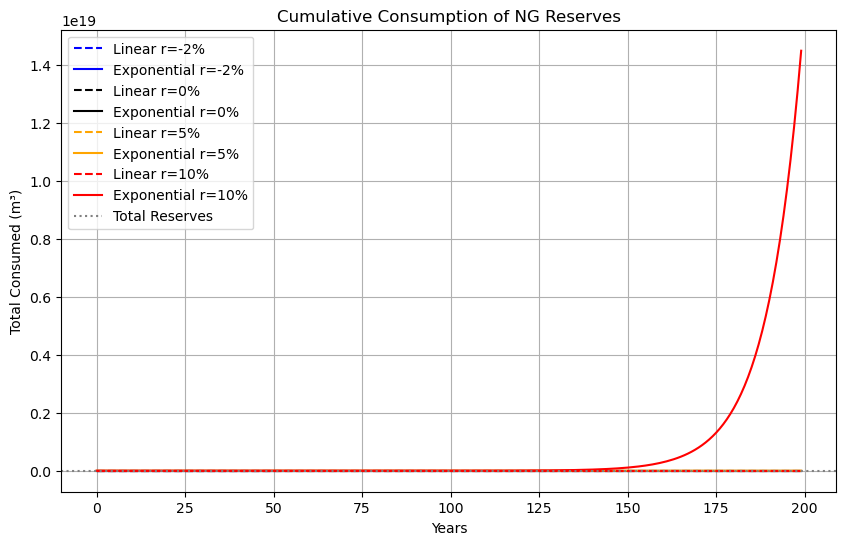

In [2]:
# Select a few representative growth rates to illustrate consumption curves
selected_rates = [-0.02, 0.0, 0.05, 0.10]  # -2%, 0%, +5%, +10%
colors = ['blue', 'black', 'orange', 'red']

plt.figure(figsize=(10,6))

for r, c in zip(selected_rates, colors):
    years = np.arange(0, 200)  # up to 200 years for visualization
    # Linear model: production P(t) = P*(1 + r*t), cumulative = sum
    cum_linear = []
    reserves = 0
    for t in years:
        production = P * (1 + r*t)
        if production < 0:
            break
        reserves += production
        cum_linear.append(reserves)
    plt.plot(years[:len(cum_linear)], cum_linear, linestyle='--', color=c, label=f"Linear r={r*100:.0f}%")

    # Exponential model: production P(t) = P*exp(r*t), cumulative = integral
    if r == 0:
        cum_expo = P * years
    else:
        cum_expo = (P/r) * (np.exp(r*years) - 1)
    plt.plot(years, cum_expo, linestyle='-', color=c, label=f"Exponential r={r*100:.0f}%")

# Plot total reserves as a horizontal line
plt.axhline(R, color='gray', linestyle=':', label="Total Reserves")

plt.xlabel("Years")
plt.ylabel("Total Consumed (m³)")
plt.title("Cumulative Consumption of NG Reserves")
plt.legend()
plt.grid(True)
plt.show()


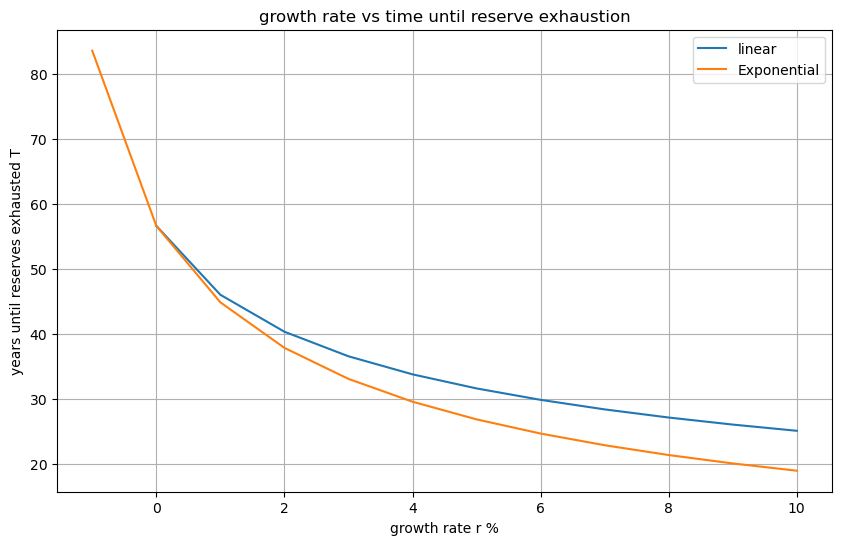

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import brentq

R = 1.87e11  # total reserves (m3)
P0 = 3.3e9   # initial annual production (m3)

def P_linear(t, r):
    return P0 * (1 + r*t)

def P_expo(t, r):
    return P0 * np.exp(r*t)

# integrate for cumulative consumption C
def C_linear(T, r):
    val, _ = quad(P_linear, 0, T, args=(r,))
    return val

def C_expo(T, r):
    val, _ = quad(P_expo, 0, T, args=(r,))
    return val

# C(T) = R
def exhaustion_time(func, r, guess_max=500):
    try:
        return brentq(lambda T: func(T, r) - R, 0, guess_max)
    except ValueError:
        return np.nan  # no valid solution

# grwoth rates from -2% to +10%
rates = np.arange(-0.02, 0.101, 0.01)
T_linear = [exhaustion_time(C_linear, r) for r in rates]
T_expo   = [exhaustion_time(C_expo, r) for r in rates]

plt.figure(figsize=(10,6))
plt.plot(rates*100, T_linear, label="linear")
plt.plot(rates*100, T_expo, label="Exponential")
plt.xlabel("growth rate r %")
plt.ylabel("years until reserves exhausted T")
plt.title("growth rate vs time until reserve exhaustion")
plt.legend()
plt.grid(True)
plt.show()

# # --- Plot 2: Consumption vs Years ---
# selected_rates = [-0.02, 0.0, 0.05, 0.10]  # representative rates
# colors = ['blue', 'black', 'orange', 'red']

# plt.figure(figsize=(10,6))

# for r, c in zip(selected_rates, colors):
#     years = np.linspace(0, 120, 400)
    
#     # Linear cumulative consumption
#     C_lin = [C_linear(t, r) for t in years]
#     plt.plot(years, C_lin, '--', color=c, label=f"Linear r={r*100:.0f}%")
    
#     # Exponential cumulative consumption
#     C_exp = [C_expo(t, r) for t in years]
#     plt.plot(years, C_exp, '-', color=c, label=f"Exponential r={r*100:.0f}%")
    
#     # Markers for exhaustion times
#     T_lin = exhaustion_time(C_linear, r)
#     T_exp = exhaustion_time(C_expo, r)
#     if not np.isnan(T_lin):
#         plt.plot(T_lin, R, 'o', color=c)
#     if not np.isnan(T_exp):
#         plt.plot(T_exp, R, 's', color=c)

# # Total reserves line
# plt.axhline(R, color='gray', label="Total Reserves")

# plt.xlabel("Years")
# plt.ylabel("Total Consumed (m³)")
# plt.title("Cumulative NG Consumption vs Time")
# plt.legend()
# plt.grid(True)
# plt.show()
